    • sku_id – уникальный идентификатор товара
    • price – цена, по которой был продан товар
    • number – количество товаров (если не топливо), значит где 0 - топливо
    • cheque_id – уникальный идентификатор чека
    • litrs – количество литров (если товар - топливо)
    • client_id – уникальный идентификатор клиента (если клиент «представился» при покупке)
    • shop_id – уникальный идентификатор магазина
    • date – дата транзакции
    • full_name – полное наименование товара
    • brand – наименование торговой марки
    • sku_group – группа, к которой принадлежит товар
    • OTM – признак собственной торговой марки
    • units – единица измерения для количества 
    • country – страна производства товара

In [4]:
#pip install pandas numpy matplotlib seaborn tqdm pyarrow

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
import re, tqdm

%matplotlib inline

In [3]:
# lets take a look at some null values
file = 'data/transactions.parquet'
df_tran = pd.read_parquet(file, engine='pyarrow')
df_tran.isnull().sum()
#display(df_tran.dtypes)
#df_tran.head(5)

sku_id             0
price              0
number             0
cheque_id          0
litrs              0
client_id    3772355
shop_id            0
date               0
dtype: int64

In [6]:
# change nan values on 0
df_tran['client_id'] = df_tran['client_id'].fillna(0)

In [7]:
df_tran.isnull().sum()
# better

sku_id       0
price        0
number       0
cheque_id    0
litrs        0
client_id    0
shop_id      0
date         0
dtype: int64

In [8]:
# client id, for whatever reason have a float value
display(df_tran.dtypes)

sku_id                int64
price               float64
number              float64
cheque_id             int64
litrs               float64
client_id           float64
shop_id               int64
date         datetime64[ns]
dtype: object

In [9]:
# cid - client id
# cast cid into int
df_tran['client_id'] = df_tran['client_id'].astype(int)
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,0.002335,0.0,3338297,0.147929,78634,102,2171-07-23
1,1158,0.002317,0.0,3386107,0.134562,20900,101,2171-07-23


In [10]:
# this will delete all the duplicates
print("before: {}".format(len(df_tran)))

before: 7620119


In [11]:
df_tran.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
print("after: {}".format(len(df_tran)))

after: 6800919


In [13]:
# sort by date, also there was something about "analize the data of the 5 months"
# lets add another collumn so that we'll be able to comprehend the data better
df_tran = df_tran.sort_values(by='date')
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
7620118,1158,0.002270,0.000000,1764664,0.159197,192548,77,2171-03-01
7585450,3324,0.006106,0.000452,2262585,0.104183,345359,96,2171-03-01


In [14]:
# this is the collumn I was talking about
df_tran['month'] = df_tran['date'].apply(lambda d: d.month)
df_tran.head(2)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,month
7620118,1158,0.002270,0.000000,1764664,0.159197,192548,77,2171-03-01,3
7585450,3324,0.006106,0.000452,2262585,0.104183,345359,96,2171-03-01,3


<AxesSubplot:xlabel='count', ylabel='month'>

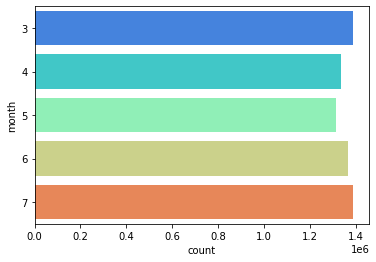

In [15]:
sns.countplot(data=df_tran, y='month', palette='rainbow')
# use countplot to plot our data

In [16]:
file = 'data/nomenclature.parquet'
df_nom = pd.read_parquet(file, engine='pyarrow')
df_nom.head(2)

,sku_id,full_name,brand,sku_group,OTM,units,country
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ
1,723,Трос УранПРОМEthereum буксировочный 4500кг,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ


In [17]:
df_nom.isnull().sum()
# will do the same operations on this table as in the prev one

sku_id       0
full_name    9
brand        9
sku_group    0
OTM          9
units        9
country      9
dtype: int64

In [18]:
# store empty index values in the []
holind = []
# collect all the values which are null
for col in df_nom.columns:
    holind = [*holind, *df_nom[df_nom[col].isna()].index.values]
    
holind = list(set(holind))
#df_nom.head(2)

,sku_id,full_name,brand,sku_group,OTM,units,country
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ
1,723,Трос УранПРОМEthereum буксировочный 4500кг,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ


In [19]:
# lets check what we got
print(holind)

[3787, 3724, 3727, 3728, 3825, 3858, 4407, 4922, 3771]


In [20]:
# check the first one, for example,
df_nom.iloc[[3787]]
# yeah, looks 'null' enough, to say the least
# dunno, maybe we will restore this data somehow in the future,

,sku_id,full_name,brand,sku_group,OTM,units,country
3787,1159,None,None,Ethereum 95,None,None,None


In [24]:
# and here's the whole 'null table'
df_nom.iloc[[3787, 3724, 3727, 3728, 3825, 3858, 4407, 4922, 3771]]

,sku_id,full_name,brand,sku_group,OTM,units,country
3787,1159,None,None,Ethereum 95,None,None,None
3724,1158,None,None,Ethereum 92,None,None,None
3727,1157,None,None,Ethereum 95 бренд,None,None,None
3728,1163,None,None,Топливо варповое с присадками летнее,None,None,None
3825,1162,None,None,Топливо варповое с присадками зимнее,None,None,None
3858,2032,None,None,Ethereum 100 бренд,None,None,None
4407,1161,None,None,Топливо варповое летнее,None,None,None
4922,1771,None,None,Топливо варповое с присадками межсезонное,None,None,None
3771,1160,None,None,Топливо варповое зимнее,None,None,None


In [32]:
# and here we can see that the indeces in transactions table can be matched with our 
# nomenculature table 1 to 1, since, in df_nom we have only fuel, and in the table represented below, we can see 
# that all data in it is about fuel because 'litrs' collumn has non-na or null data
df_tran.loc[[3787, 3724, 3727, 3728, 3825, 3858, 4407, 4922, 3771]]

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,month
3787,1159,0.002599,0.000000,1645138,0.142674,389109,41,2171-07-24,7
3724,1159,0.002612,0.000000,2728377,0.146984,157943,67,2171-07-24,7
3727,1159,0.002591,0.000000,2875575,0.159396,1362,84,2171-07-24,7
3728,400,0.003540,0.000452,2582771,0.104183,0,103,2171-07-24,7
3825,1159,0.002581,0.000000,2623716,0.143759,290521,6,2171-07-24,7
3858,1159,0.002617,0.000000,1912645,0.123692,320110,25,2171-07-24,7
4407,1777,0.006927,0.000452,1444733,0.104183,0,19,2171-07-24,7
4922,1159,0.002617,0.000000,1885562,0.113938,0,26,2171-07-24,7
3771,1159,0.002617,0.000000,1912756,0.134044,146000,25,2171-07-24,7


In [37]:
# create 'null' dataframe, so that it will be easier to manipulate data
df_empty_data = df_nom.loc[holind]
df_empty_data

,sku_id,full_name,brand,sku_group,OTM,units,country
3787,1159,None,None,Ethereum 95,None,None,None
3724,1158,None,None,Ethereum 92,None,None,None
3727,1157,None,None,Ethereum 95 бренд,None,None,None
3728,1163,None,None,Топливо варповое с присадками летнее,None,None,None
3825,1162,None,None,Топливо варповое с присадками зимнее,None,None,None
3858,2032,None,None,Ethereum 100 бренд,None,None,None
4407,1161,None,None,Топливо варповое летнее,None,None,None
4922,1771,None,None,Топливо варповое с присадками межсезонное,None,None,None
3771,1160,None,None,Топливо варповое зимнее,None,None,None


In [41]:
# mark nan units as litres
df_nom.at[holind, 'units']='л'

In [42]:
# ok, lets take a look at some cheques
pd.merge(df_tran[df_tran['client_id'] == 389109], df_nom, on="sku_id").sort_values(by='price').head(6)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,month,full_name,brand,sku_group,OTM,units,country
6,1158,0.002324,0.000000,1552126,0.126151,389109,37,2171-06-18,6,None,None,Ethereum 92,None,л,None
0,1159,0.002565,0.000000,2787004,0.140922,389109,17,2171-05-06,5,None,None,Ethereum 95,None,л,None
1,1159,0.002599,0.000000,1645138,0.142674,389109,41,2171-07-24,7,None,None,Ethereum 95,None,л,None
8,2346,0.006414,0.000452,1645138,0.104183,389109,41,2171-07-24,7,Сигареты Chesterfield classic red,Chesterfield,Табачные изделия,Нет,шт,unknown
9,3039,0.006414,0.000904,1645138,0.104183,389109,41,2171-07-24,7,Напиток G-Fly (СТМ) Football Edition энергетич...,G-Fly (СТМ),Энергетические напитки,Нет,л,РОССИЯ
2,3832,0.008158,0.000452,2787004,0.104183,389109,17,2171-05-06,5,Сигареты Winston XStyle Plus duo/XStyle dual,Winston,Табачные изделия,Нет,unknown,unknown
